In [1]:
library(Seurat)
library(future)


Attaching SeuratObject

Attaching sp



In [2]:
#Multi cpu core usage, adjust workers for the number of cpu cores
plan("multiprocess", workers = 15)
options(future.globals.maxSize = 120000 * 1024^2)
plan()

Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


multiprocess:
- args: function (..., workers = 15, envir = parent.frame())
- tweaked: TRUE
- call: plan("multiprocess", workers = 15)

In [3]:
#Base dir for all datasets
base_dir<-"/cluster/project/treutlein/DATA/sequencing/HB4_10x_timecourse_integrated/"
seurat_merged <- readRDS(paste(base_dir,"Seurat_object_HB4_D11_D16_D21_D30_merge_QC.rds",sep=""))


In [5]:
length(rownames(seurat_merged))

[1] 24264

In [4]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [5]:
seurat_merged <- CellCycleScoring(seurat_merged, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)


Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 22 features requested have not been scaled (running reduction without them): MCM2, RRM1, PRIM1, MLF1IP, RFC2, RPA2, SLBP, CCNE2, UBR7, POLD3, RAD51, CDC45, TIPIN, CASP8AP2, USP1, POLA1, CHAF1B, BRIP1, TMPO, FAM64A, HN1, CBX5”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  WDR76, MCM6, UNG, UHRF1, DTL, EXO1, MCM5, GINS2, CDC6, CDCA7 
	   FEN1, E2F8, ATAD2, DSCC1, PCNA, MCM4, BLM, CLSPN, TYMS, MSH2 
	   HELLS, CTCF, RANGAP1, GMNN, RAD51AP1, LBR, RRM2, CDC25C, GAS2L3, NASP 
Negative:  TOP2A, CENPF, TPX2, UBE2C, MKI67, NUSAP1, DLGAP5, BIRC5, GTSE1, CENPE 
	   CDK1, CDC20, AURKA, AURKB, HMMR, HMGB2, TUBB4B, SMC4, KIF2C, TACC3 
	   CKS1B, CKS2, KIF23, CDCA8, NDC80, KIF11, BUB1, CDCA3, ECT2, CCNB2 
PC_ 2 
Positive:  CENPA, NEK2, GAS2L3, CDCA3, AURKA, UBE2C, PSRC1, CKAP2

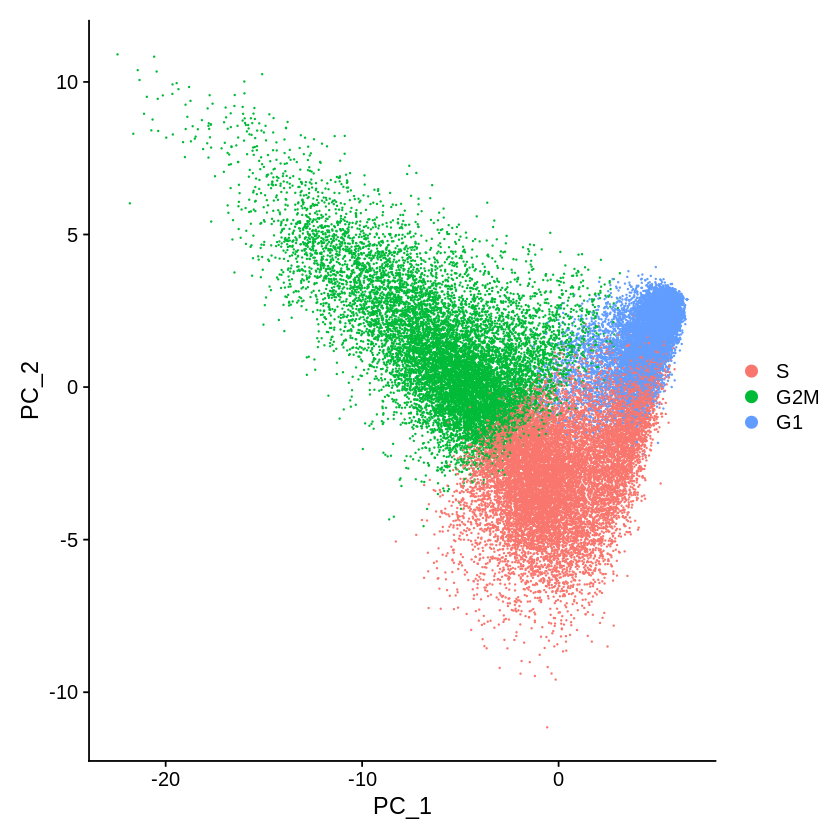

In [6]:
seurat_merged <- RunPCA(seurat_merged, features = c(s.genes, g2m.genes))
DimPlot(seurat_merged)


In [7]:
#regress out cell cycle
seurat_merged <- ScaleData(seurat_merged, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(seurat_merged))


Regressing out S.Score, G2M.Score

Centering and scaling data matrix



In [8]:
saveRDS(seurat_merged, file=paste(base_dir,"Seurat_object_HB4_D11_D16_D21_D30_merge_QC_CC_removed_v2.rds",sep=""))
